# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


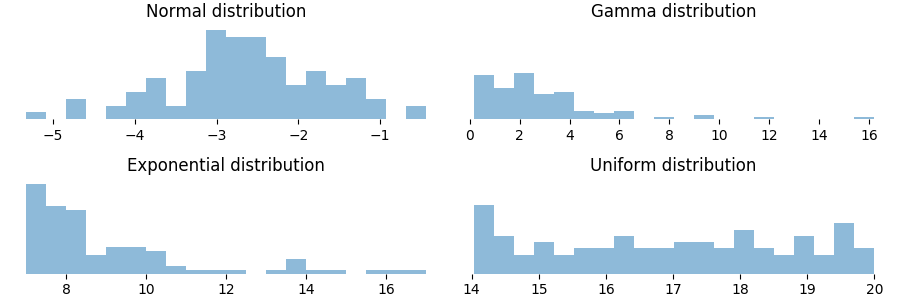

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


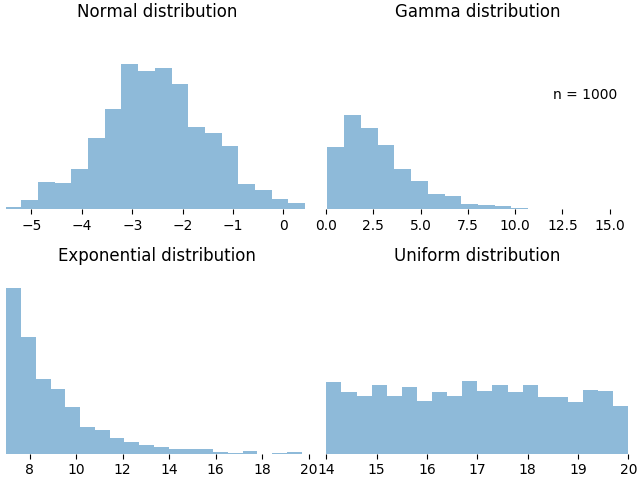

In [50]:
def setup_plot(x, xmin, xmax, ymax, title):
    plt.cla()
    _ = plt.hist(x, normed=True, bins=20, alpha=0.5)
    plt.title(title)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.axis([xmin, xmax, 0, ymax])
    plt.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    select = 100 + 900/n*curr
    if curr == n: 
        a.event_source.stop()
    upper_left = plt.subplot(2, 2, 1)
    setup_plot(x1[:select], -5.5, 0.5, 0.5, 'Normal distribution')
    upper_right = plt.subplot(2, 2, 2, sharey=upper_left)
    setup_plot(x2[:select], 0, 16, 0.5, 'Gamma distribution')
    plt.annotate('n = {:n}'.format(select), [12,0.3])
    lower_left = plt.subplot(2, 2, 3)
    setup_plot(x3[:select], 7, 20, 0.4, 'Exponential distribution')
    lower_right = plt.subplot(2, 2, 4, sharey=lower_left)
    setup_plot(x4[:select], 14, 20, 0.5, 'Uniform distribution')
    plt.tight_layout(pad=0.2, w_pad=0, h_pad=1.0)
    
import matplotlib.animation as animation

n = 20
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)